## Problem 1
$f(x,x_0,\alpha) = \frac{1}{2 \alpha}||x-x_0||_2^2+||x_1||_1$\
$\partial f(x_i,(x_{0})_i,\alpha) = \frac{1}{\alpha}(x_i - (x_{0})_i)+ \left\{\begin{array}{lll}
-1, & \textrm{if } x_i<0 \\
[-1,1], & \textrm{if } x_i = 0\\
1, & \textrm{if } x_i>0\\
\end{array}\right.$\
$\partial^2f(x_i,x_{i0},\alpha) = \begin{bmatrix}
    \frac{1}{\alpha} & 0 & \dots & 0 \\
    0 & \frac{1}{\alpha} & \dots & 0 \\
    \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & \dots & \frac{1}{\alpha}
  \end{bmatrix}+\begin{bmatrix}
      0
  \end{bmatrix}$\

Since the hessian matrix is a positive definite matrix (identity matrix), we know it is a strictly convex function. Therefore there must be a unique solution.

 From participation 4 we know that:
 $$s_{\lambda}(\alpha) = \left \{ \begin{array}{ll}
\alpha - \lambda, & \text{ if }\text{$\alpha<-\lambda$}\\
\alpha+\lambda, & \text{ if } \text{$\alpha>\lambda$}\\
0, & \text{ if } \text{$\alpha \in \lambda[-1,1]$}\\
\end{array} \right.$$

If $(x_0)_i$ is an element of $\mathbf{x_0}$, we have:
$$s_{\alpha}((x_0)_i) =\left \{ \begin{array}{ll}
(x_0)_i - \alpha, & \text{ if }\text{$(x_0)_i > \alpha$}\\
0, & \text{ if }\text{$(x_0)_i \in [-\alpha,\alpha]$}\\
(x_0)_i + \alpha, & \text{ if } \text{$(x_0)_i < -\alpha$}\\
\end{array} \right.$$

If $s_{\alpha}(x_0)_i$ is an element of  $\mathbf{s_{\alpha}(x_0)}$, we have:
$$s_{\alpha}((x_0)_i) =\left \{ \begin{array}{ll}
(x_0)_i - \alpha, & \text{ if }\text{$(x_0)_i > \alpha$}\\
0, & \text{ if }\text{$(x_0)_i \in [-\alpha,\alpha]$}\\
(x_0)_i + \alpha, & \text{ if } \text{$(x_0)_i < -\alpha$}\\
\end{array} \right.$$

Therefore, we have:
$s_{\alpha}((x_0)_i) = s_{\alpha}(x_0)_i$

## Problem 2
Since $x^*$ is a fixed point of (Prox), we know $X_{t} = X_{t+1} = X$. Therefore we can find the optimal solution for Prox by letting $0 \in \partial f$ (Fermat's condition).

$$argmin_x f = \frac{1}{2\alpha_t}||X-(X_t-\alpha_t \nabla f(x_t))||_2^2+g(x)$$
By setting $AX = IX$ and $b=(X_t-\alpha_t \nabla f(x_t))$, we can find the derivative by $||AX - b||_2^2 = A^T(AX-b)$. Since $X = X_t$, we have
\begin{align*}
    \partial f &= \frac{1}{\alpha_t}(X-(X_t-\alpha_t \nabla f(x_t)))+\partial g(x)\\
    &=\nabla f(X_t)+\partial g(X)
\end{align*}
The optimal condition for Prox is therefore $0 \in \nabla f(X_t)+\partial g(X)$.

The minimizer of Comp is also $\nabla f(X) + \partial g(X)$ as f is differentiable, so the optimality condition is also $0 \in \nabla f(X_t)+\partial g(X)$. Since the optimality conditions are the same, therefore $X^*$ is a minimizer of (Comp) if it is a fixed point of (Prox).

## Problem 3
Using (Prox), we can find $X_{t+1}$ in the composite gradient descent method by finding the gradient of f, which in this case is $\frac{1}{2}||AX-b||_2^2$. Therefore $$\nabla f(X_t) = A^T(AX_t - b)$$. Thus we have $X_{t+1}=argmin_x \frac{1}{2\alpha_t}||X-(X_t-\alpha_t A^T(AX_t - b))||_2^2 + \lambda ||X||_1$. Dividing the objective by $\lambda$ gives us $$X_{t+1}=argmin_x \frac{1}{2\alpha_t \lambda}||X-(X_t-\alpha_t A^T(AX_t - b))||_2^2 + ||X||_1$$. Therefore $X_{t+1} = S_{\alpha_t \lambda}(X_t - \alpha_t(A^T(AX_t - b)))$

## Problem 4
The sub-differential of the LASSO objective function is the gradient of $\frac{1}{2}||AX-b||_2^2$ with the sub-gradient of $\lambda ||X||_1$. Therefore the sub-differential is:
$$\nabla \frac{1}{2} ||AX-b||_2^2+\partial \lambda ||X||_1 = A^T(AX-b)+\left \{ \begin{array}{ll}
\lambda, & \text{ if }\text{$X_i>0$}\\
-\lambda, & \text{ if } \text{$X_i<0$}\\
[-\lambda,\lambda], & \text{ if } \text{$x_i = 0$}
\end{array} \right.$$

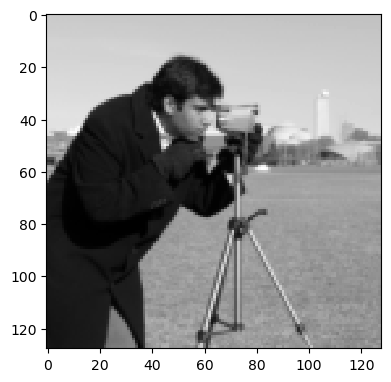

In [1]:
import numpy as np
from deblurringUtils import *
from skimage import data
n = 128
camera = data.camera()
smallcamera = resize(camera, [n, n])
camdata = img_as_float(smallcamera)
visualize(camdata)

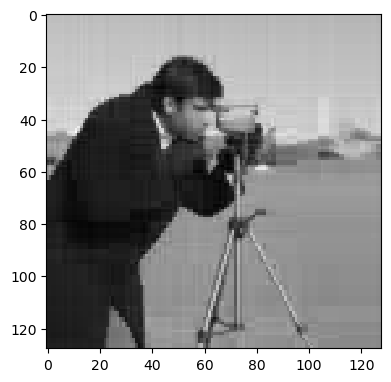

In [2]:
H = vectorized2DHaarMatrix(n, n) # the Haar matrix, an orthonormal basis
haarcoeffs = H.T @ vectorize(camdata) # convert to the Haar basis
p = 90 # what percentage of the coefficients to set to zero
thres = np.percentile(np.abs(haarcoeffs), p)
haarcoeffs[abs(haarcoeffs) <= thres] = 0 # set most entries to zero
# reconstruct the image from the sparse representation
reconstim = unvectorize(H @ haarcoeffs, n, n)
visualize(reconstim)


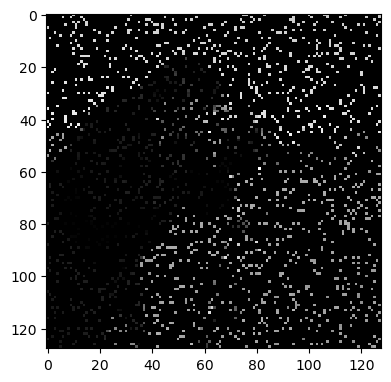

In [3]:
import numpy.random as random
# mask the same percentage of pixels, randomly
mask = np.ones(n**2)
mask[:int(p/100*n**2)] = 0
mask = unvectorize(random.permutation(mask), n, n)
visualize(camdata * mask )

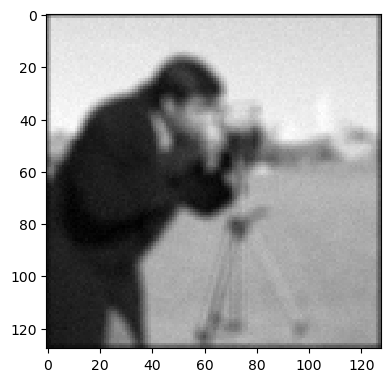

In [4]:
B = vectorized2DBlurMatrix(n, n, 5);
std = 1e-2
corruption = std * random.randn(n**2)
b = B @ vectorize(smallcamera) + corruption
blurredcam = unvectorize(b, n, n)
visualize(blurredcam)

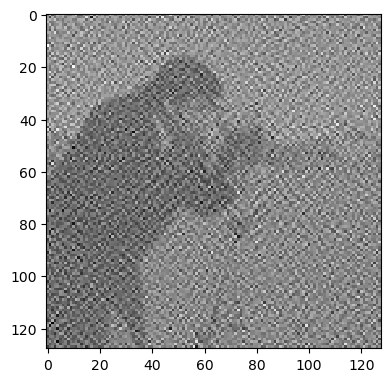

In [5]:
from scipy.sparse.linalg import gmres
from scipy.sparse import csr_matrix
# solving with sparse matrices is faster
sB = csr_matrix(B)
linres, _ = gmres(sB, b, maxiter=50)
visualize(unvectorize(linres, n, n))

In [6]:
from scipy.sparse.linalg import svds
A=B@H
_, topsv, _ = svds(A, k=1)
alphaSubgrad = 1/topsv**2
print(f"The step size is {alphaSubgrad}")

The step size is [1.00235522]


## Define our LASSO Regression solver starting from here

In [7]:
def softShrink(x0, alpha):
    return np.sign(x0) * np.maximum(np.abs(x0) - alpha, 0)

def istaLasso(A, b, lambda_reg, x0, alpha, T):
    '''returns xT , the T th iterate of the composite gradient method for (LASSO) when the initial iterate
    is x0 and the stepsize constant and given by alpha; it should also return a vector containing the
    objective values at each of the iterates x0, . . . , xT . Use your function softShrink.'''
    objhist = list()
    xT = np.copy(x0).reshape(-1,1)
    for i in range(T):
        xT = softShrink(xT-alpha*A.T@(A@xT-b),alpha*lambda_reg)
        objhist.append(0.5*np.linalg.norm(A@xT-b)**2+lambda_reg*(np.linalg.norm(xT,ord = 1)))
    return [xT,objhist]

def lassoSubgrad(A, b, lambda_reg, x):
    res = A.T@(A@x-b)
    subgrad = np.zeros(x.shape)
    subgrad[x>0] = lambda_reg
    subgrad[x<0] = -lambda_reg
    return res+subgrad

def subgradLasso(A, b, lambda_reg, x0, alpha, T):
    objhist = list()
    xT = np.copy(x0)
    for i in range(T):
        g = lassoSubgrad(A,b,lambda_reg,xT)
        xT -= alpha*g
        objhist.append(0.5*np.linalg.norm(A@xT-b)**2+lambda_reg*(np.linalg.norm(xT,ord = 1)))
    return [xT,objhist]

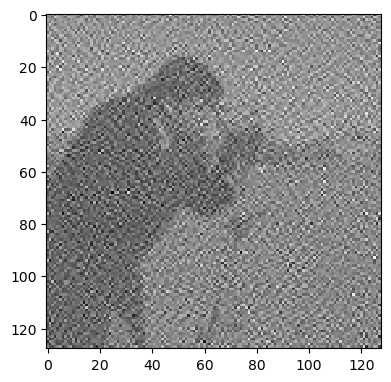

The final objective value for subgrad method is 1.55125427673868


In [8]:
lambda_reg = 2e-4
T = 1000
subgrad_xT,subgrad_objhist = subgradLasso(A,b.reshape(-1,1),lambda_reg,np.random.randn(A.shape[1],1),alphaSubgrad.item(),T)
blurredcam = unvectorize(H@subgrad_xT, n, n)
visualize(blurredcam)
print(f'The final objective value for subgrad method is {subgrad_objhist[-1]}')

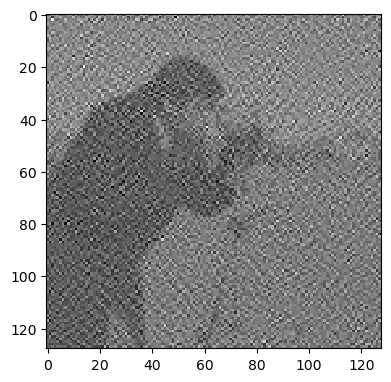

The final objective value for ISTA method is 1.5599830718909655


In [9]:
lambda_reg = 2e-4
T = 1000
ISTA_xT,ISTA_objhist = istaLasso(A,b.reshape(-1,1),lambda_reg,np.random.randn(A.shape[1],1),alphaSubgrad.item(),T)
blurredcam = unvectorize(H@ISTA_xT, n, n)
visualize(blurredcam)
print(f'The final objective value for ISTA method is {ISTA_objhist[-1]}')

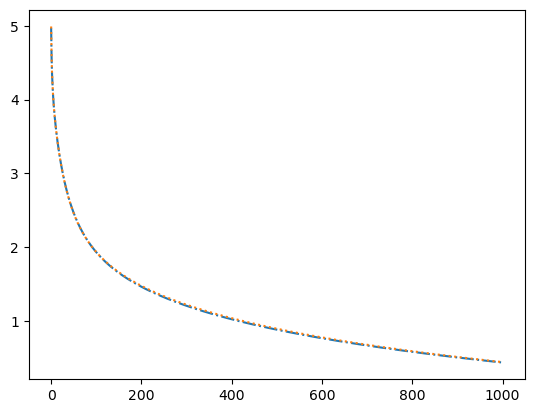

In [10]:
import matplotlib.pyplot as plt
import numpy as np
log_subgrad_objhist = list()
log_ISTA_objhist = list()
for i in range(len(subgrad_objhist)):
    log_subgrad_objhist.append(np.log(subgrad_objhist[i]))
for i in range(len(ISTA_objhist)):
    log_ISTA_objhist.append(np.log(ISTA_objhist[i]))
plt.plot(range(len(subgrad_objhist)), log_subgrad_objhist, label = "subgrad", linestyle="-.")
plt.plot(range(len(ISTA_objhist)), log_ISTA_objhist, label = "ista", linestyle=":")

What conclusions do you draw about the relative merits of the two approaches to solving the LASSO problem? What are the advantages and disadvantages of solving the LASSO problem vs the least squares problem?

Response: The graph for those two methods suggest the performance of these two methods are relatively the same. However, the running time for these two methods varies significantly. The lasso subgrad method takes around 1 min 8.8s and the ista lasso method takes 11 min 30.9s. Thus the subgrad method is more suitable for this problem.

The advantage for solving the LASSO problem is it encourages sparsity. Therefore it is suitable for this problem as we want x to be sparse. The disadvantage is there is no closed form solution to this problem. If we use the least squares method, we can find x by $A^{-1}b$, which is faster than iterative methods.

We plotted the LASSO objective to verify visually that the methods seem to be converging. Comment on the meaningfulness of that value in measuring the quality of the recovered solution. Can you think of a more meaningful metric to report the quality of the iterates? (You may not use knowledge of the true image to compute that metric)

Response: It is not the most meaningful metric. The similarity between the blurred images does not suggest a similarity between $X_{LASSO}$ and $X_{true}$. A more meaningful metric is to find the liklihood of the noise $\epsilon$ with respect to  a gaussian distribution. Since $b = BHz_{true} + \epsilon = Bx_{true}+\epsilon$, $b-BHz_{true} = \epsilon$. Since the corruption we added conforms to gaussian distribution, $b-BHz^*$ should also conform to the gaussian distribution. The more the noise conforms to the gaussian distribution, the better the image we reconstruct.